## 파이썬으로 방사형 차트(Radar chart) 그리는 방법 알아보기
---
방사형 차트(Radar chart)라는 이름은 생소한 분들이 많겠지만, 의외로 차트의 생김새를 본다면 익숙하게 느껴질 수 있습니다. 방사형 차트는 셋 이상의 항목을 둥글게 배치한 다음, 각 항목별로 어느 정도 수준인지 보여주는 다변량 데이터 시각화 방법입니다. 이 때, 방향이나 각도는 별다른 정보를 포함하지 않지만, 방사형 차트가 보여주는 면적의 경우 특정 항목과 다른 항목간의 상관관계 등을 표현할 수 있다는 장점이 있답니다.  
</p></br></br>


백문이 불여일견이라고 방사형 차트를 한번 그려보도록 하겠습니다. 이번에는 임의의 다섯 가지 요소와 값을 설정한 뒤, 파이썬(Python)의 맷플롯립(Matplotlib) 패키지를 이용해 시각화를 해 보겠습니다.  
</p></br></br>



In [1]:
# 패키지 불러오기
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
theta = ['A', 'B', 'C', 'D', 'E']
r = [10, 15, 11, 5.9, 8.4]

</p></br></br>


위와 같이, `theta` 와 `r` 이 정의되었다면 이번에는 그래프를 둥근 모양으로 만들어보는 작업입니다. 원형 공간을 사용하는 작업이기 때문에, 파이(pi, π)를 활용하며, 반지름이 r인 원의 길이는 `2πr` 라는 점을 이용해 2π를 기준으로 어느 정도 위치에 꼭지점(theta)이 위치할 것인지를 정의해 보는 작업이 필요합니다.  
</p></br></br>


다음으로는, 주어진 꼭지점을 따라 labels와 values의 값을 배치하는 작업입니다. 이 때 원 모양을 둘러서 값을 배치하므로, 시작점(angles[0])에서 출발해서 시계방향으로 한바퀴 돌아 다시 시작점으로 돌아오는 방식으로 배치를 해 보겠습니다. 이를 위해, labels와 values의 첫 번째 값을 복사해 마지막 값 다음에 추가해 주는 작업을 진행합니다.  
</p></br></br>



In [2]:
# 데이터 복사
labels = theta.copy()
values = r.copy()

# 몇각형의 radar chat를 그릴지 정의
num_vars = len(labels)

# 꼭지점 좌표 정의
angles = np.linspace(0, 2*np.pi, len(theta), endpoint=False).tolist()

# 원형 배치를 위해 첫 번째 값을 추가
values += values[:1]
angles += angles[:1]

</p></br></br>


마지막으로, Matplotlib 패키지의 `plot()` 함수를 이용해 그래프를 그려주면 됩니다. 이 때, `subplot_kw` 매개변수에서 둥근 형태의 그래프라는 점을 명시해 줘야 하는데, `polar=True` 라고 적어주시면 됩니다. 다음에는 angles, values 값을 각각 x, y 좌표로 입력을 하면 Radar chart를 손쉽게 그릴 수 있습니다. 만약 차트 안쪽에 색깔을 채워넣고 싶다면 Matplotlib의 `fill()` 함수를 추가로 사용해 주면 됩니다.  
</p></br></br>



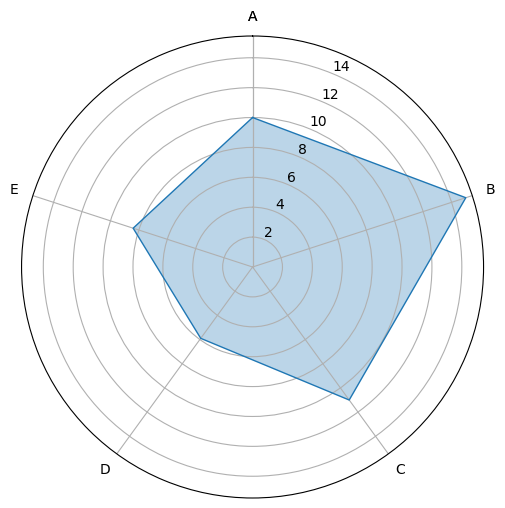

In [3]:
# 원형 도표 정의
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(polar=True))

# 도표 그리기
ax.plot(angles, values, linewidth=1)

# 색깔 채우기
ax.fill(angles, values, alpha=.3)

# 시계방향으로 값이 배치되도록 조정
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# labels 정보 표시
ax.set_thetagrids(np.degrees(angles), labels + [labels[0]])

plt.show()

</p></br></br>


위와 같이 파이썬 맷플롯립으로 방사형 차트를 그려봤습니다. 코드를 보면 아시겠지만, 아래와 같은 선 그래프를 동그란 공간에 표시한 간단한 표현 방법이랍니다. 그래서, 전통적인 x, y축 데이터를 보여주는 2차원 도표와 같이 축 정보를 수정하거나 제목을 작성하는 등 Matplotlib의 거의 모든 기능을 제약 없이 이용할 수 있으니, 원하는 스타일로 도표를 수정해 보셔도 좋겠습니다.  
</p></br></br>



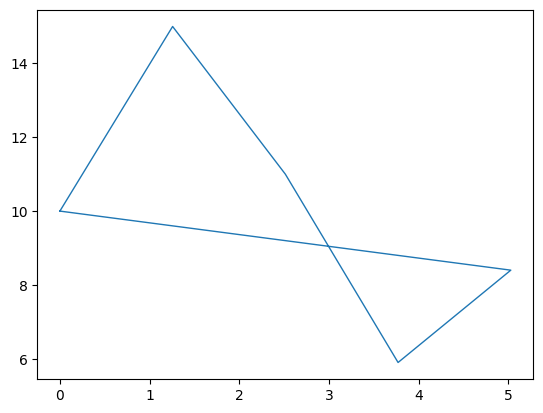

In [4]:
plt.plot(angles, values, linewidth=1)
plt.show()